## Imports

In [1]:
from manage_show_data_class import manage_show_data_class as ManageData
from lstm_binary_classification_class import lstm_class as LSTMClass
import random
import numpy as np
import matplotlib.pyplot as plt

2023-10-29 00:47:48.774624: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-29 00:47:50.054003: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ulises/anaconda3/envs/tf/lib/
2023-10-29 00:47:50.054135: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ulises/anaconda3/envs/tf/lib/
2023-10-29 00:47:50.054144: W tensorflow/compiler/tf2ten

## Filter Data

In [2]:
# Filter data
train_test_dataset_folder = "TrainTestDataset"
predict_dataset_folder_location = "PredictDataset"
sequence_len = 20
# Create the objet ManageData.
Manage_data_class = ManageData(dataset_folder_location=train_test_dataset_folder, predict_dataset_folder_location=predict_dataset_folder_location, min_percentage_peak=1.25, percentage_peak=1.8, min_len_noise=3, max_len_noise=20, sequence_len= sequence_len)

# DONE

#Manage_data_class.filter_empty_json_data()
#Manage_data_class.filter_short_extractions()
#Manage_data_class.show_json_data(100)


## Create dataset

In [3]:
random.seed(1)
np.random.seed(1)

# Create the dataset.
predictors, Y, predictors_to_predict, Y_to_predict, number_sequence_by_prediction, when_te_perturbation_start = Manage_data_class.create_dataset()
#print(predictors.shape)

# normalize the dataset
# scaler = MinMaxScaler(feature_range=(0, 1))
# predictors = scaler.fit_transform(predictors)

# Split the dataset
x_train, x_test, y_train, y_test = Manage_data_class.split_datasets(predictors,Y)

# Reshape OUT
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

## Train model (LTSM)

In [4]:
# Build and train model.
model_lstm = LSTMClass(sequence_len)
model_lstm.build_model()
history_lstm = model_lstm.train_model(x_train, x_test, y_train, y_test)
#model_lstm.save_model()

2023-10-29 00:47:51.084381: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-29 00:47:51.099181: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-29 00:47:51.102546: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-29 00:47:51.104378: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

Epoch 1/15


2023-10-29 00:47:54.400686: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100


364/364 [==============================] - 5s 5ms/step - loss: 0.0726 - accuracy: 0.9790 - val_loss: 0.0274 - val_accuracy: 0.9981
Epoch 2/15
364/364 [==============================] - 2s 5ms/step - loss: 0.0200 - accuracy: 0.9977 - val_loss: 0.0042 - val_accuracy: 0.9995
Epoch 3/15
364/364 [==============================] - 2s 4ms/step - loss: 0.0175 - accuracy: 0.9956 - val_loss: 0.0017 - val_accuracy: 0.9995
Epoch 4/15
364/364 [==============================] - 2s 4ms/step - loss: 0.0117 - accuracy: 0.9978 - val_loss: 0.0029 - val_accuracy: 0.9997
Epoch 5/15
364/364 [==============================] - 1s 4ms/step - loss: 0.0129 - accuracy: 0.9982 - val_loss: 0.0016 - val_accuracy: 0.9997
Epoch 6/15
364/364 [==============================] - 2s 4ms/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 0.0015 - val_accuracy: 0.9997
Epoch 7/15
364/364 [==============================] - 1s 4ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0016 - val_accuracy: 0.9997
Epoch 8/15
364/36

In [5]:
# Predict.
Y_predicted, when_the_rock_is_detected = model_lstm.predict(predictors_to_predict, number_sequence_by_prediction)


1/1 [==============================] - 0s 19ms/step


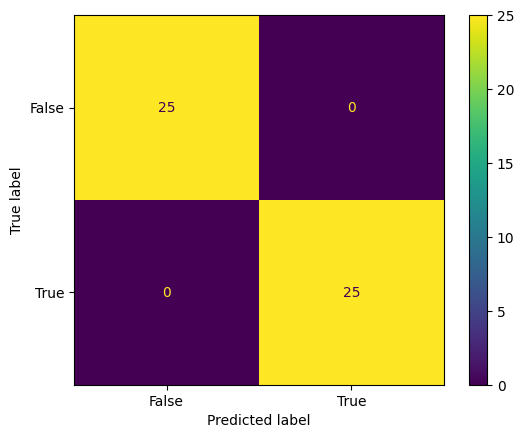

When the perturbation start: 
 [58, 33, 40, 31, 25, 23, 38, 38, 34, 25, 57, 23, 24, 32, 56, 53, 30, 50, 41, 34, 27, 55, 26, 40, 45]
When the perturbation is detected: 
 [59, 34, 41, 32, 26, 24, 39, 39, 35, 26, 58, 24, 25, 33, 57, 54, 31, 51, 42, 35, 28, 56, 27, 41, 46]


In [ ]:
# Plot confusion matrix and when the rock is detected.
model_lstm.plot_confusion_matrix(Y_to_predict, Y_predicted)
print("When the perturbation start: \n", when_te_perturbation_start)

print("When the perturbation is detected: \n", when_the_rock_is_detected[25:])

